<a href="https://colab.research.google.com/github/Lewis727/ECON-DKU/blob/master/ECON211/week2/Admission_pred_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score

Data downloaded from https://www.kaggle.com/mohansacharya/graduate-admissions?rvi=1 <br>
The features are factors considered in the graduate school application process. Note that GRE score and TOEFL score are in old version. The target variable is the chance of getting admitted.<br>The task has been reframed as a classification problem. The dataset can be used to explore which aspect is weighed the most in the application process.

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/Lewis727/ECON-DKU/master/ECON211/week2/Admission_Predict.csv')
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# slice the target variable into three ranks and turn it into a classifiction problem
data['adm_chance']=pd.qcut(data['Chance of Admit '],3,labels=np.arange(1,4,1))

# name the classes
data['Rank']=data['adm_chance'].apply(lambda x: 'High' if x==3 else 'Average' if x==2 else 'Low')

# rename columns and delete unused ones
data.drop(columns=['adm_chance','Chance of Admit '],inplace = True)
data.rename(columns = {'Rank':'adm_chance'},inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,adm_chance
0,337,118,4,4.5,4.5,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Average
2,316,104,3,3.0,3.5,8.00,1,Average
3,322,110,3,3.5,2.5,8.67,1,High
4,314,103,2,2.0,3.0,8.21,0,Low


# Build Decision Tree

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['adm_chance'])
y = data['adm_chance']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.77


# Plot the Decision Tree

In [6]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


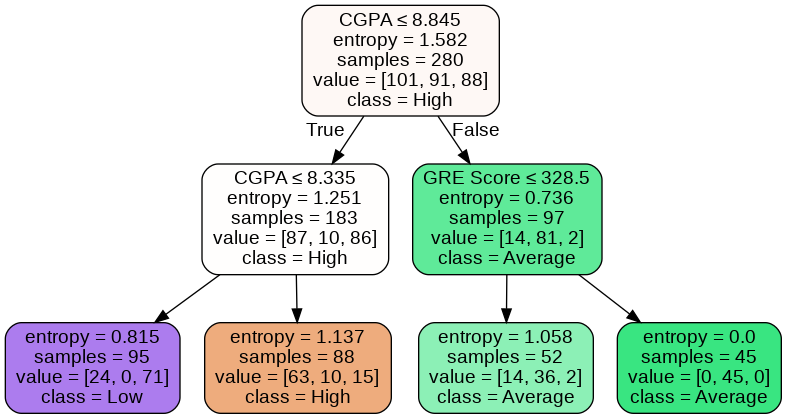

In [8]:
dot_data = StringIO()
feature_names = list(X.columns)
class_names = list(y.unique())
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names, class_names = class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('grad_admission_pred.png')
Image(graph.create_png())